In [1]:
%load_ext autoreload

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import FootballClf
from FixturesOdds import FixturesOdds

In [5]:
fixture_cols=['FixtureDateAsDate','HomeTeam', 'AwayTeam']
odds_cols=['HomeOdds', 'DrawOdds', 'AwayOdds']
predict_cols=['prediction']
result_cols=['HomeTeamResult']
bet_results_cols=['stake', 'applic_odds', 'betprofit']

In [6]:
def summary(fix, agg_level):
    grouper = fix.df.groupby(fix.df.FixtureDateAsDate.dt.to_period(agg_level).dt.start_time)
    df = pd.DataFrame(grouper.betprofit.sum())
    df['stake'] = grouper.stake.sum()
    df['betting_account'] = df.betprofit.cumsum()
    
    return df

In [7]:
def get_a_predictor(Refresh=False, clf_name='betting clf_2.2'):
    fix_pred=FixturesOdds()
    fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', Refresh) # no reresh
    fix_pred.do_calcs()
    fix_pred.clean_predict()
    X=fix_pred.X()
    c=FootballClf.FootballClf()
    clf=c.load_by_name(clf_name)
    fix_pred.df['prediction'] = clf.predict(fix_pred.X())
    fix_pred.calc_bet_results(1)
    
    return fix_pred

In [31]:
fix_pred=FixturesOdds()
fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', False) # no reresh
fix_pred.do_calcs()
fix_pred.clean_predict()

In [32]:
X=fix_pred.X()
c=FootballClf.FootballClf()
clf=c.load_by_name('betting clf_2.2')

In [33]:
fix_pred.df['prediction'] = clf.predict(fix_pred.X())

In [34]:
fix_pred.calc_bet_results(1)

In [8]:
fix_pred = get_a_predictor()

In [9]:
fix_pred.filter_by_col('season',2018).filter_by_col('leagueid', [1,2])

In [10]:
summary(fix_pred, 'M')

,betprofit,stake,betting_account
FixtureDateAsDate,,,
2018-08-01,28.57,-69,28.57
2018-09-01,51.34,-98,79.91
2018-10-01,39.56,-91,119.47
2018-11-01,22.17,-66,141.64


In [12]:
# now we will exclude fixtures where the predicted result is less than 0.5

In [29]:
fix_pred.filter_by_col('HomeTeamResult','D')

In [46]:
df =fix_pred.df
print ('Percentage of all'(df.HomeTeamResult=='D').sum()/(df.HomeTeamResult).count()

0.27469135802469136

In [180]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.prediction], fix_pred.df.HomeTeamResult, margins=True)

HomeTeamResult        D   L    W  All
leagueid prediction                  
1        L           10  27    9   46
         W           16  16   42   74
2        L           21  24   21   66
         W           42  28   68  138
All                  89  95  140  324

In [184]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.prediction], fix_pred.df.HomeTeamResult, normalize='columns')

HomeTeamResult              D         L         W
leagueid prediction                              
1        L           0.112360  0.284211  0.064286
         W           0.179775  0.168421  0.300000
2        L           0.235955  0.252632  0.150000
         W           0.471910  0.294737  0.485714

In [181]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.prediction], fix_pred.df.HomeTeamResult, margins=True).apply(lambda r: r/r.sum(), axis=1)

HomeTeamResult              D         L         W  All
leagueid prediction                                   
1        L           0.108696  0.293478  0.097826  0.5
         W           0.108108  0.108108  0.283784  0.5
2        L           0.159091  0.181818  0.159091  0.5
         W           0.152174  0.101449  0.246377  0.5
All                  0.137346  0.146605  0.216049  0.5

In [185]:
# how to decide if we are going to bet on two teams that are very similar?  Home advantage?

In [187]:
df_d = fix_pred.df[fix_pred.df.HomeTeamResult=='D']
df_d.columns

Index(['FixtureID', 'season', 'leagueid', 'fixDate', 'HomeTeamID', 'FTHG',
       'AwayTeamID', 'FTAG', 'HomeELO_prev', 'AwayELO_prev', 'HomeTeamResult',
       'AwayTeamResult', 'HomeTeam', 'AwayTeam', 'FTHG_3', 'FTAG_3', 'FTHG_5',
       'FTAG_5', 'HomeOdds', 'DrawOdds', 'AwayOdds', 'FixtureDateAsDate',
       'Target', 'HTRecord', 'ATRecord', 'ExpectedResult', 'FTG_3', 'FTG_5',
       'prediction', 'stake', 'applic_odds', 'betprofit'],
      dtype='object')

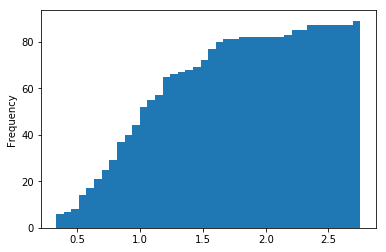

In [190]:
df_d.ExpectedResult.plot.hist(bins=40,cumulative=True)

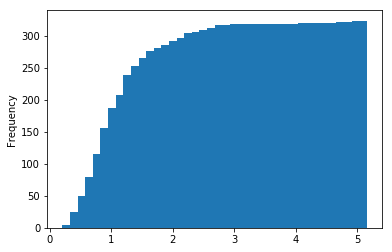

In [191]:
fix_pred.df.ExpectedResult.plot.hist(bins=40,cumulative=True)